In [52]:
import numpy as np
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
from collections import Counter

In [31]:
mc = pymongo.MongoClient()
db = mc['allrecipes']
recipes_coll = db['recipes']
results_coll = db['search_results']

In [110]:
cursor = recipes_coll.find()
chili_recipes = []
recipe_ids = []
for recipe in cursor:
    if recipe['category']['lvl_2'] == 'Chili':
        chili_recipes.append(recipe)
        recipe_ids.append(recipe['id'])

In [111]:
len(chili_recipes)

169

In [50]:
pd.DataFrame(chili_recipes[0]['ingredients'])

,ingredient,normalized_qty,quantity,units
0,beef,40.00,2.5,pound
1,pork,16.00,1.0,pound
2,butter,4.00,0.5,cup
3,garlic,1.00,2.0,clove
4,green bell pepper,16.00,1.0,pound
5,onion,24.00,1.5,pound
6,pinto beans,30.00,30.0,ounce
7,tomato,40.00,5.0,cup
8,parsley,4.00,0.5,cup
9,chili powder,1.00,2.0,tablespoon


In [54]:
ingredients = Counter()
for recipe in chili_recipes:
    for item in recipe['ingredients']:
        ingredients[item['ingredient']] += 1
print('Number of unique ingredients :', len(ingredients))

Number of unique ingredients : 364


In [138]:
ingredients.most_common()

[('onion', 125),
 ('chili powder', 125),
 ('cumin', 116),
 ('tomato', 107),
 ('garlic', 100),
 ('beef', 66),
 ('salt', 63),
 ('oregano', 61),
 ('kidney beans', 58),
 ('green bell pepper', 56),
 ('black pepper', 51),
 ('water', 47),
 ('olive oil', 46),
 ('tomato sauce', 44),
 ('cayenne pepper', 42),
 ('black beans', 40),
 ('tomato paste', 38),
 ('red bell pepper', 34),
 ('chicken broth', 31),
 ('vegetable oil', 30),
 ('jalapeno pepper', 30),
 ('garlic powder', 25),
 ('turkey', 23),
 ('cilantro', 23),
 ('paprika', 22),
 ('red pepper flake', 22),
 ('pinto beans', 21),
 ('celery', 21),
 ('chicken breast', 21),
 ('parsley', 18),
 ('green chile pepper', 17),
 ('basil', 16),
 ('chili beans', 15),
 ('cheddar cheese', 15),
 ('brown sugar', 14),
 ('white sugar', 13),
 ('cinnamon', 12),
 ('salsa', 12),
 ('great northern beans', 12),
 ('worcestershire sauce', 11),
 ('cannellini beans', 11),
 ('pepper sauce', 11),
 ('sour cream', 10),
 ('carrot', 10),
 ('green onion', 10),
 ('yellow onion', 10),
 (

In [56]:
common_ingredients = []
for item, count in ingredients.items():
    if count > 1:
        common_ingredients.append(item)
print('Number of common ingredients :', len(common_ingredients))

Number of common ingredients : 165


In [109]:
common_ingredients.sort()
common_ingredients

['allpurpose flour',
 'allspice',
 'anaheim chile pepper',
 'ancho chile powder',
 'bacon',
 'bacon grease',
 'balsamic vinegar',
 'barbeque sauce',
 'basil',
 'basil leave',
 'bay leaf',
 'bay leave',
 'beans',
 'beef',
 'beef bouillon cube',
 'beef bouillon granule',
 'beef broth',
 'beef chuck',
 'beef stew meat',
 'beer',
 'black beans',
 'black pepper',
 'brown sugar',
 'buffalo',
 'burgerstyle crumble',
 'butter',
 'cannellini beans',
 'canola oil',
 'carrot',
 'cayenne pepper',
 'celery',
 'cheddar cheese',
 'chicken',
 'chicken bouillon',
 'chicken breast',
 'chicken broth',
 'chicken stock',
 'chile powder',
 'chili beans',
 'chili beans in sauce',
 'chili beans in spicy sauce',
 'chili powder',
 'chili sauce',
 'chili seasoning mix',
 'chipotle chile powder',
 'chipotle pepper',
 'chipotle peppers in adobo sauce',
 'chorizo sausage',
 'cilantro',
 'cinnamon',
 'clove',
 'cloves garlic',
 'cocoa powder',
 'coriander',
 'corn',
 'corn kernel',
 'cornmeal',
 'cumin',
 'curry pow

In [75]:
recipe_df_1 = pd.DataFrame(chili_recipes[0]['ingredients'])
servings_1 = chili_recipes[0]['directions']['servings']
series_1 = recipe_df_1.set_index('ingredient')['normalized_qty'] / servings_1

In [77]:
recipe_df_2 = pd.DataFrame(chili_recipes[1]['ingredients'])
servings_2 = chili_recipes[1]['directions']['servings']
series_2 = recipe_df_2.set_index('ingredient')['normalized_qty'] / servings_1

In [78]:
pd.DataFrame([series_1, series_2]).fillna(0)

,beef,pork,butter,garlic,green bell pepper,onion,pinto beans,tomato,parsley,chili powder,...,monosodium glutamate,salt,cumin,olive oil,celery,flat beer,water,tomato paste,kidney beans,sour cream
normalized_qty,3.333333,1.333333,0.333333,0.083333,1.333333,2.000000,2.5,3.333333,0.333333,0.083333,...,0.020833,0.041667,0.020833,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000
normalized_qty,2.666667,0.000000,0.000000,0.000000,0.500000,1.333333,0.0,0.000000,0.006944,0.083333,...,0.000000,0.000000,0.013889,0.041667,0.333333,1.0,0.666667,0.5,1.25,0.666667


In [79]:
servings_2

8

In [99]:
series_list = []
for recipe in chili_recipes:
    df = pd.DataFrame(recipe['ingredients'])
    servings = recipe['directions']['servings']
    servings = 1 if not servings else servings
    series = df.set_index('ingredient')['normalized_qty'] / servings
    series_list.append(series.rename(recipe['id']))

In [100]:
series_list[5]

ingredient
beef                     2.666667
dark red kidney beans    7.500000
mexicanstyle tomato      7.250000
celery                   0.666667
red bell pepper          1.000000
red wine vinegar         0.333333
chili powder             0.166667
cumin                    0.027778
parsley                  0.027778
basil                    0.027778
worcestershire sauce     0.016667
red wine                 0.666667
Name: 13067, dtype: float64

In [115]:
chili_df = pd.DataFrame(columns=common_ingredients, index=recipe_ids).fillna(0)
chili_df

,allpurpose flour,allspice,anaheim chile pepper,ancho chile powder,bacon,bacon grease,balsamic vinegar,barbeque sauce,basil,basil leave,...,white onion,white pepper,white sugar,white vinegar,white wine,worcestershire sauce,yellow bell pepper,yellow onion,yellow squash,zucchini
214843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
for recipe in chili_recipes:
    idx = recipe['id']
    servings = recipe['directions']['servings']
    for item in recipe['ingredients']: 
        ing = item['ingredient']
        qty = item['normalized_qty']
        if ing in chili_df.columns:
            chili_df.loc[idx, ing] = qty / servings if servings else qty
chili_df

,allpurpose flour,allspice,anaheim chile pepper,ancho chile powder,bacon,bacon grease,balsamic vinegar,barbeque sauce,basil,basil leave,...,white onion,white pepper,white sugar,white vinegar,white wine,worcestershire sauce,yellow bell pepper,yellow onion,yellow squash,zucchini
214843,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000
26462,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000
15386,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000
16188,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000
8835,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000
13067,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0000,0.027778,0.0,...,0.000000,0.0,0.000000,0.000000,0.00,0.016667,0.0,0.000000,0.000000,0.000000
24406,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000
23118,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000
15868,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000
80760,0.000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.00,0.333333,0.0,0.000000,0.000000,0.000000


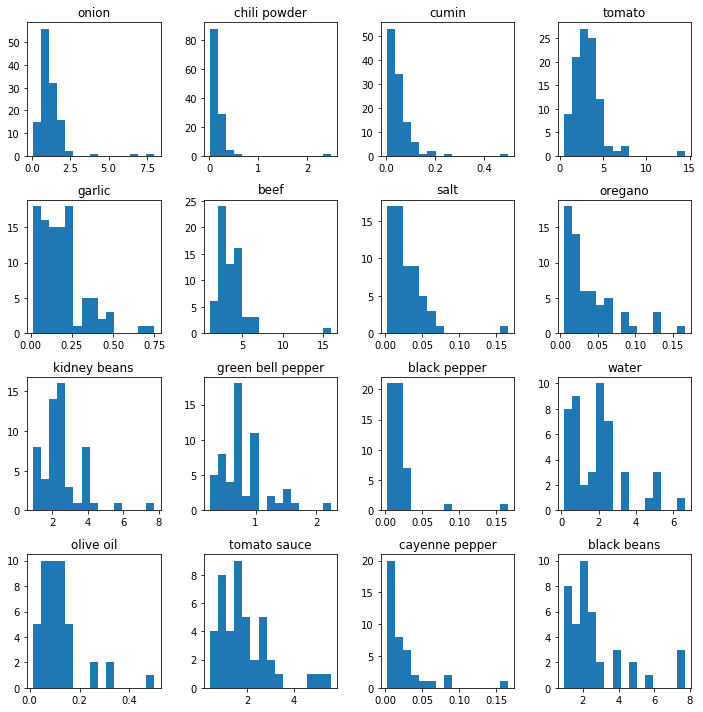

In [143]:
sorted_ings = [item[0] for item in ingredients.most_common()]
fig, axs = plt.subplots(4,4, figsize=(10,10))
for i, ax in enumerate(axs.flatten()):
    non_zero = chili_df[chili_df[sorted_ings[i]] > 0][sorted_ings[i]]
    ax.hist(non_zero, bins=15)
    ax.set_title(sorted_ings[i])
fig.tight_layout()

In [141]:
non_zero = chili_df[chili_df[sorted_ings[0]] > 0][sorted_ings[0]]

In [142]:
non_zero

214843    2.000000
26462     2.000000
15386     1.142857
16188     2.000000
8835      1.600000
24406     1.333333
23118     1.333333
15868     1.333333
80760     1.333333
25722     1.000000
25686     0.666667
79779     0.055556
80969     1.000000
166859    1.000000
217002    0.800000
220192    1.000000
131107    0.666667
16962     2.000000
193873    1.000000
108455    0.400000
15084     6.666667
254689    1.333333
14021     1.000000
26357     1.000000
22302     2.000000
22924     1.000000
223390    1.600000
168976    0.500000
12897     2.000000
218979    1.333333
            ...   
26468     1.000000
236999    1.333333
78889     0.666667
228404    1.333333
12892     1.666667
8627      2.000000
236091    0.800000
13157     0.500000
23995     1.333333
90315     1.000000
236599    1.333333
241736    1.000000
237758    1.333333
221960    1.333333
24265     1.000000
22403     1.600000
129482    1.000000
150297    1.000000
17023     1.000000
212397    0.400000
181572    2.000000
215311    1.